In [2]:
"""
TO-DO : Create two models of Passive aggressive classifier using tfidf and hash dataset
        Hopefully it performs better than Naive bayes
        Future Rahul : ↑↑↑ HAHAHAAHAHAHHAHAHAHAHAAHAHHAHA ↑↑↑
        
        
        Summary of the model : Accuracy is with respect to "dev"
        ------------------------------
        Model Name: pac_tfidf
        Algorithm : Passive aggresive Classifier - tfidf
        Time to train : 0.467
        Accuracy : 0.73
        -------------------------------
        
        ------------------------------
        Model Name: pac_hash
        Algorithm : Passive aggresive Classifier - tfidf
        Time to train : 0.683
        Accuracy : 0.74
        -------------------------------
        
Rahul's Intuition : Unlike in naive bayes, the training accuracy is decent, not too high for overfitting though.
                    The drop in the accuracy wrt to dev set shows potential for improvement. It has high optimization
                    potential.




"""

'\nTO-DO : Create two models of Passive aggressive classifier using tfidf and hash dataset\n        Hopefully it performs better than Naive bayes\n        \n        Summary of the model : Accuracy is with respect to "dev"\n        ------------------------------\n        Model Name: clb/clb_lap\n        Algorithm : Naive Bayers - TFIDF MultinomialNB\n        Time to train : 0.067\n        Accuracy : 0.76\n        Accuracy with smoothing:0.77293\n        -------------------------------\n        \n        ------------------------------\n        Model Name: clf/clf_lap\n        Algorithm : Naive Bayers - Hash MultinomialNB\n        Time to train : 0.112\n        Accuracy : 0.77\n        Accuracy with smoothing:0.75453\n        -------------------------------\n        \n'

In [1]:
import pandas as pd
import import_ipynb
import Vectorization as v
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from matplotlib import pyplot as plt

importing Jupyter notebook from Vectorization.ipynb
importing Jupyter notebook from Dataset_Preprocessing_2.ipynb
Megaset size 70628
Columns :  Index(['Rating', 'Statement'], dtype='object')
Number of true statements :  18814
Number of false statements :  16500
(35314,)
(35314,)
31782
3532
28250
3532
<class 'pandas.core.series.Series'>
Final size of train/dev/test :  28250 / 3532 / 3532
28250
(28250,)
<class 'pandas.core.series.Series'>
(28250,)


In [3]:
#Storing tfidf variables for the model

tfidf_mega_train_x = v.tfidf_mega_train_x
tfidf_mega_dev_x = v.tfidf_mega_dev_x
tfidf_mega_test_x = v.tfidf_mega_test_x



mega_train_y=v.mega_train_y
mega_dev_y=v.mega_dev_y


Time Taken to fit and classify : 0.46775078773498535
accuracy: 0.7301812004530012
Confusion matrix, without normalization
[[1161  492]
 [ 461 1418]]


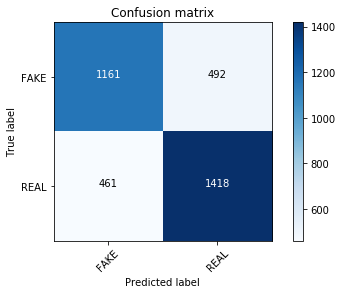

In [14]:
#--------------------------------------------------------------
# Applying Passive Aggressive Classifier with tfidf
#--------------------------------------------------------------

pac_tfidf = PassiveAggressiveClassifier(n_iter=50)

start = time.time()

pac_tfidf.fit(tfidf_mega_train_x, mega_train_y)
pred_pac_tfidf = pac_tfidf.predict(tfidf_mega_dev_x)

end = time.time()

print("Time Taken to fit and classify :",(end - start))

score = metrics.accuracy_score(mega_dev_y, pred_pac_tfidf)
print("accuracy:",score)
cm_pac_tfidf = metrics.confusion_matrix(mega_dev_y, pred_pac_tfidf)
v.plot_confusion_matrix(cm_pac_tfidf, classes=['FAKE', 'REAL'])
print(cm_pac_tfidf)

#looping to find the best n_iter is required
#Find other ways to increase the accuracy


accuracy: 0.9358938053097345
Confusion matrix, without normalization
[[12234   946]
 [  865 14205]]


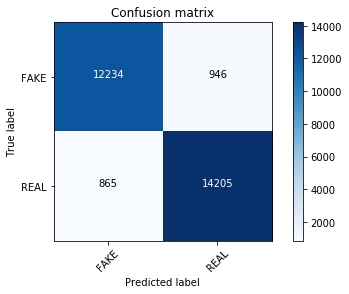

In [16]:
#TRAINING ON TRAIN DATA FOR bias and variance w.r.t to tfidf

pred_train_pac = pac_tfidf.predict(tfidf_mega_train_x)                     # Perform classification 

score = metrics.accuracy_score(mega_train_y, pred_train_pac)
print("accuracy:" ,score)

cm = metrics.confusion_matrix(mega_train_y, pred_train_pac)
v.plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

#great Training accuracy . Leaning slightely towards high variance

In [17]:
#Lets hope hash does better

#Storing variables from hash fuction

hash_mega_train_x = v.hash_mega_train_x 
hash_mega_test_x = v.hash_mega_test_x
hash_mega_dev_x = v.hash_mega_dev_x 

Time Taken to fit and classify : 0.6831471920013428
accuracy: 0.7457531143827859
Confusion matrix, without normalization
[[1197  456]
 [ 442 1437]]


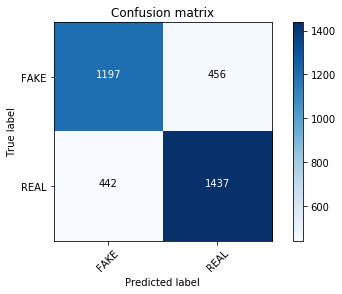

In [21]:
#--------------------------------------------------------------
# Applying Passive Aggressive Classifier with hash
#--------------------------------------------------------------

pac_hash = PassiveAggressiveClassifier(n_iter=50)

start = time.time()

pac_hash.fit(hash_mega_train_x, mega_train_y)
pred_pac_hash = pac_hash.predict(hash_mega_dev_x)

end = time.time()

print("Time Taken to fit and classify :",(end - start))

score = metrics.accuracy_score(mega_dev_y, pred_pac_hash)
print("accuracy:",score)
cm_pac_hash = metrics.confusion_matrix(mega_dev_y, pred_pac_hash)
v.plot_confusion_matrix(cm_pac_hash, classes=['FAKE', 'REAL'])
print(cm_pac_hash)

#unhappy with the accuracy, try and optimize and also loop the damm n_iter !!

accuracy: 0.9258761061946903
Confusion matrix, without normalization
[[12144  1036]
 [ 1058 14012]]


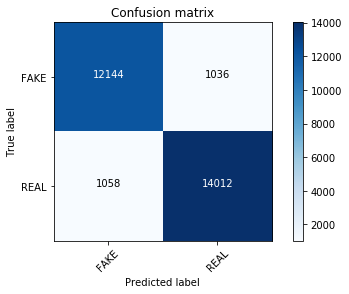

In [22]:
#TRAINING ON TRAIN DATA FOR bias and variance w.r.t to hash

pred_train_pach = pac_hash.predict(hash_mega_train_x)                     # Perform classification 

score = metrics.accuracy_score(mega_train_y, pred_train_pach)
print("accuracy:" ,score)

cm_pach = metrics.confusion_matrix(mega_train_y, pred_train_pach)
v.plot_confusion_matrix(cm_pach, classes=['FAKE', 'REAL'])
print(cm_pach)

#great Training accuracy . Leaning slightely towards high variance again.